In [1]:
import numpy as np
import pandas as pd

In [2]:
data1=pd.read_csv("closes_Quandl_Rolling_EDs.csv",index_col=[0])
data1=data1.loc['1/3/05':]

In [3]:
data2=pd.read_csv("imm_Quandl_Rolling_EDs.csv",index_col=[0])
data2.index.name="Date"
#data2=data2.iloc[0:np.where(data2.index=='4/4/2017')[0][0]+1]
data2=data2.loc['1/3/05':]
#data1.index=data2.index
data2.head()

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
Date,,,,,,,,,,,,,,,,,,,,,
1/3/05,3/16/05,6/15/05,9/21/05,12/21/05,3/15/06,6/21/06,9/20/06,12/20/06,3/21/07,6/20/07,...,9/19/12,12/19/12,3/20/13,6/19/13,9/18/13,12/18/13,3/19/14,6/18/14,9/17/14,12/17/14
1/4/05,3/16/05,6/15/05,9/21/05,12/21/05,3/15/06,6/21/06,9/20/06,12/20/06,3/21/07,6/20/07,...,9/19/12,12/19/12,3/20/13,6/19/13,9/18/13,12/18/13,3/19/14,6/18/14,9/17/14,12/17/14
1/5/05,3/16/05,6/15/05,9/21/05,12/21/05,3/15/06,6/21/06,9/20/06,12/20/06,3/21/07,6/20/07,...,9/19/12,12/19/12,3/20/13,6/19/13,9/18/13,12/18/13,3/19/14,6/18/14,9/17/14,12/17/14
1/6/05,3/16/05,6/15/05,9/21/05,12/21/05,3/15/06,6/21/06,9/20/06,12/20/06,3/21/07,6/20/07,...,9/19/12,12/19/12,3/20/13,6/19/13,9/18/13,12/18/13,3/19/14,6/18/14,9/17/14,12/17/14
1/7/05,3/16/05,6/15/05,9/21/05,12/21/05,3/15/06,6/21/06,9/20/06,12/20/06,3/21/07,6/20/07,...,9/19/12,12/19/12,3/20/13,6/19/13,9/18/13,12/18/13,3/19/14,6/18/14,9/17/14,12/17/14


In [4]:
data1.fillna(method='ffill',limit=5);
data1.head()

,Settle_ED1,Settle_ED2,Settle_ED3,Settle_ED4,Settle_ED5,Settle_ED6,Settle_ED7,Settle_ED8,Settle_ED9,Settle_ED10,Settle_ED11,Settle_ED12,Settle_ED13,Settle_ED14,Settle_ED15,Settle_ED16,Settle_ED17,Settle_ED18,Settle_ED19,Settle_ED20
Date,,,,,,,,,,,,,,,,,,,,
1/3/05,2.910,3.195,3.420,3.590,3.700,3.795,3.885,3.980,4.060,4.145,4.225,4.320,4.395,4.490,4.580,4.670,4.750,4.840,4.930,5.025
1/4/05,2.935,3.270,3.510,3.695,3.810,3.905,3.985,4.075,4.160,4.245,4.325,4.390,4.460,4.550,4.635,4.725,4.800,4.890,4.975,5.065
1/5/05,2.945,3.275,3.515,3.705,3.820,3.910,3.995,4.080,4.150,4.230,4.300,4.420,4.450,4.530,4.610,4.700,4.770,4.860,4.940,5.030
1/6/05,2.935,3.235,3.475,3.660,3.770,3.870,3.960,4.055,4.135,4.215,4.285,4.365,4.450,4.530,4.610,4.705,4.775,4.865,4.945,5.035
1/7/05,2.945,3.265,3.515,3.710,3.835,3.925,4.005,4.095,4.160,4.220,4.320,4.370,4.475,4.555,4.635,4.730,4.800,4.885,4.965,5.055


In [5]:
con_time=np.arange(0.25,5,0.25)
data3=pd.DataFrame(index=data2.index,columns=con_time)
data3.columns=[str(tmp)+'Y' for tmp in data3.columns]

In [6]:
#generate the business day
#don't need this cell
from pandas.tseries.offsets import CustomBusinessDay
from pandas.tseries.holiday import USFederalHolidayCalendar

bday_us = CustomBusinessDay(calendar=USFederalHolidayCalendar())
bday_list=pd.DatetimeIndex(start='20170405',end='20221231',freq=bday_us).to_pydatetime()
date_format1="%-m/%-d/%Y"
bday_list_str=np.array([tmp.strftime(date_format1) for tmp in bday_list])
bday_list_str=np.hstack((data1.index,bday_list_str))

#get the index range
def get_index_range(date1,date2):
    return np.where(bday_list_str==date2)[0][0]-np.where(bday_list_str==date1)[0][0]

In [7]:
#interpolate the data,return the constant maturity interpolation
from scipy.interpolate import interp1d
from datetime import datetime

date_format="%m/%d/%y"
def interpolate_data(date):
    y=data1.loc[date]
    x=[float((datetime.strptime(date_it,date_format)-datetime.strptime(date,date_format)).days)/360 
       for date_it in data2.loc[date][:20]]
    f=interp1d(x,y,fill_value='extrapolate')
    return f(con_time)

In [8]:
interpolate_data('3/14/17')

array([ 1.33565934,  1.47906593,  1.63126374,  1.7671978 ,  1.91357143,
        2.04923077,  2.18274725,  2.27917582,  2.36412088,  2.44417582,
        2.53120879,  2.58901099,  2.63461538,  2.67912088,  2.73483516,
        2.77576923,  2.81038462,  2.84857143,  2.89516484])

In [9]:
except_date=[]
for date_it in data1.index:
    try:
        data3.loc[date_it]=interpolate_data(date_it)
    except:
        except_date.append(date_it)
        print date_it

In [10]:
data3.head()

,0.25Y,0.5Y,0.75Y,1.0Y,1.25Y,1.5Y,1.75Y,2.0Y,2.25Y,2.5Y,2.75Y,3.0Y,3.25Y,3.5Y,3.75Y,4.0Y,4.25Y,4.5Y,4.75Y
Date,,,,,,,,,,,,,,,,,,,
1/3/05,2.96637,3.23403,3.43681,3.60048,3.71357,3.80093,3.89022,3.98352,4.0628,4.14676,4.22604,4.32,4.39418,4.48791,4.57703,4.66604,4.7456,4.83407,4.92308
1/4/05,3.00495,3.31408,3.53033,3.70732,3.82454,3.91115,3.99093,4.07967,4.16374,4.24764,4.32643,4.39077,4.46,4.54901,4.63313,4.72203,4.7967,4.88505,4.9694
1/5/05,3.01753,3.32153,3.53797,3.71869,3.83469,3.91747,4.00154,4.08462,4.1544,4.23308,4.30396,4.42066,4.45088,4.53,4.60912,4.69802,4.76769,4.85604,4.9356
1/6/05,3.00423,3.28398,3.4994,3.6744,3.78735,3.8789,3.96835,4.06115,4.14027,4.21885,4.28852,4.3678,4.45176,4.53088,4.61,4.70396,4.77346,4.86203,4.94148
1/7/05,3.02236,3.31857,3.54286,3.72786,3.85153,3.93379,4.0139,4.10071,4.16462,4.22659,4.32275,4.37462,4.47764,4.55676,4.63604,4.73,4.79923,4.88313,4.96236


In [11]:
data3.isnull().sum()

0.25Y    13
0.5Y     12
0.75Y    12
1.0Y     13
1.25Y    14
1.5Y     13
1.75Y    13
2.0Y     17
2.25Y    18
2.5Y     21
2.75Y    20
3.0Y     25
3.25Y    25
3.5Y     25
3.75Y    26
4.0Y     28
4.25Y    33
4.5Y     35
4.75Y    35
dtype: int64

/Users/qichaohuang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


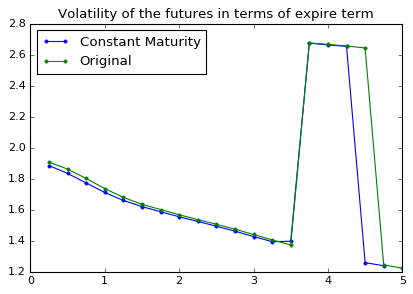

In [12]:
#compare volatility curve
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax=plt.subplots()
ax.plot(con_time,data3.std(),'.-')

ax.plot(np.hstack((con_time,5)),data1.std(),'.-')
ax.legend(['Constant Maturity','Original'],loc='upper left')
ax.set_title('Volatility of the futures in terms of expire term')

We could see that the volatility of the constant maturity is less than the original volatility. The reason is there is no instant change when the futures was rolling.

In [13]:
data3.to_csv('constant_maturity_ed.csv')

In [14]:
datetime.strptime(data2.loc['3/14/17'][0],date_format)-datetime.strptime('3/14/17',date_format)

datetime.timedelta(99)

In [15]:
#eurodollar roll
data1.loc['3/13/17':'3/14/17']

,Settle_ED1,Settle_ED2,Settle_ED3,Settle_ED4,Settle_ED5,Settle_ED6,Settle_ED7,Settle_ED8,Settle_ED9,Settle_ED10,Settle_ED11,Settle_ED12,Settle_ED13,Settle_ED14,Settle_ED15,Settle_ED16,Settle_ED17,Settle_ED18,Settle_ED19,Settle_ED20
Date,,,,,,,,,,,,,,,,,,,,
3/13/17,1.1312,1.355,1.50,1.650,1.785,1.935,2.070,2.205,2.295,2.38,2.46,2.545,2.595,2.645,2.69,2.745,2.78,2.82,2.86,2.905
3/14/17,1.3500,1.495,1.65,1.785,1.935,2.070,2.205,2.295,2.380,2.46,2.55,2.600,2.645,2.690,2.75,2.785,2.82,2.86,2.91,2.940


In [16]:
data3.loc['3/13/17':'3/14/17']

,0.25Y,0.5Y,0.75Y,1.0Y,1.25Y,1.5Y,1.75Y,2.0Y,2.25Y,2.5Y,2.75Y,3.0Y,3.25Y,3.5Y,3.75Y,4.0Y,4.25Y,4.5Y,4.75Y
Date,,,,,,,,,,,,,,,,,,,
3/13/17,1.33216,1.48247,1.63022,1.76571,1.91192,2.04775,2.18126,2.27819,2.36319,2.4433,2.52632,2.58346,2.63291,2.67863,2.73049,2.77038,2.80857,2.84813,2.89115
3/14/17,1.33566,1.47907,1.63126,1.7672,1.91357,2.04923,2.18275,2.27918,2.36412,2.44418,2.53121,2.58901,2.63462,2.67912,2.73484,2.77577,2.81038,2.84857,2.89516


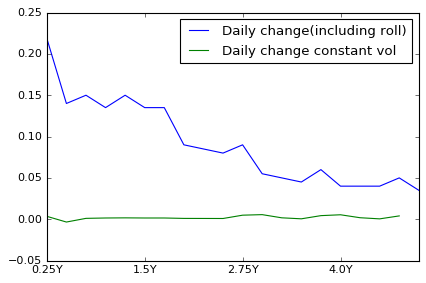

In [17]:
x1=data1.loc['3/14/17']-data1.loc['3/13/17']
x2=data3.loc['3/14/17']-data3.loc['3/13/17']
x1.plot()
x2.plot()
plt.legend(['Daily change(including roll)','Daily change constant vol'])
